### Setup

In [1]:
import matplotlib.pyplot as plt
import datetime

import dask.dataframe as dd
import pandas as pd
import skmob

In [2]:
def load_InTAS(path: str) -> pd.DataFrame:
    intas = dd.read_csv(
        path,
        sep=";",
        usecols=[
            "timestep_time",
            "vehicle_id",
            "vehicle_x",
            "vehicle_y",
            "person_id",
            "person_x",
            "person_y",
        ],
    )
    intas['trajectory_id'] = intas["vehicle_id"].fillna(intas["person_id"])
    intas['x'] = intas["vehicle_x"].fillna(intas["person_x"])
    intas['y'] = intas["vehicle_y"].fillna(intas["person_y"])
    InTAS_datetime = datetime.datetime(2019, 11, 1)
    intas["t"] = dd.to_datetime(
        intas["timestep_time"],
        unit="s",
        origin=InTAS_datetime,
    )
    return intas.compute()

In [3]:
def hist_plot(data1, data2, title1, title2, xlabel, ylabel):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotar o primeiro histograma no primeiro subplot
    axes[0].hist(data1, bins=30, color='blue', alpha=0.7)
    axes[0].set_title(title1)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)

    # Plotar o segundo histograma no segundo subplot
    axes[1].hist(data2, bins=30, color='green', alpha=0.7)
    axes[1].set_title(title2)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()

    # Mostrar os plots
    plt.show()

In [4]:
df1 = load_InTAS("./datasets/6_as_10hrs/fcd.csv")
intas_title1 = "InTAS (6-10 horas)"
intas1 = skmob.TrajDataFrame(
    df1, latitude="y", longitude="x", datetime="t", user_id="trajectory_id"
)
intas_title2 = "InTAS (15-19 horas)"
df2 = load_InTAS("./datasets/15_as_19hrs/fcd.csv")
intas2 = skmob.TrajDataFrame(
    df2, latitude="y", longitude="x", datetime="t", user_id="trajectory_id"
)

### Waiting Times (Point-to-Point)

In [20]:
from skmob.measures.individual import waiting_times

In [21]:
rg1 = waiting_times(intas1)
wt2 = waiting_times(intas2)

100%|██████████| 26446/26446 [00:36<00:00, 728.38it/s] 


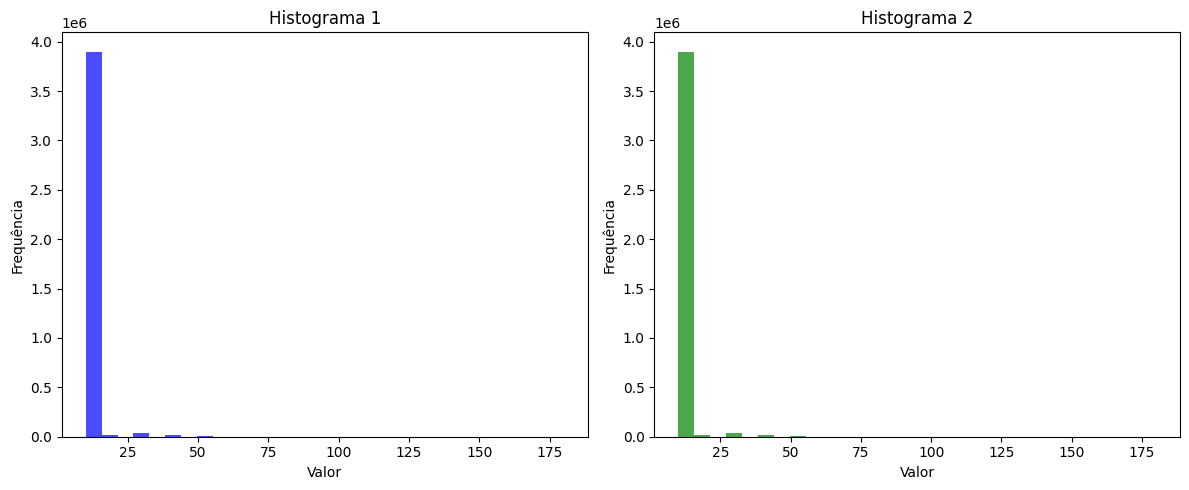

In [22]:
# Desempacotar os arrays de waiting_times em uma única lista de números
data1 = [time for sublist in rg1["waiting_times"] for time in sublist]
data2 = [time for sublist in rg1["waiting_times"] for time in sublist]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotar o primeiro histograma no primeiro subplot
axes[0].hist(data1, bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histograma 1')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frequência')

# Plotar o segundo histograma no segundo subplot
axes[1].hist(data2, bins=30, color='green', alpha=0.7)
axes[1].set_title('Histograma 2')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os plots
plt.show()

### Radius of Gyration

In [9]:
from skmob.measures.individual import radius_of_gyration

In [10]:
rg1 = radius_of_gyration(intas1)
rg2 = radius_of_gyration(intas2)

100%|██████████| 26446/26446 [01:03<00:00, 413.68it/s]


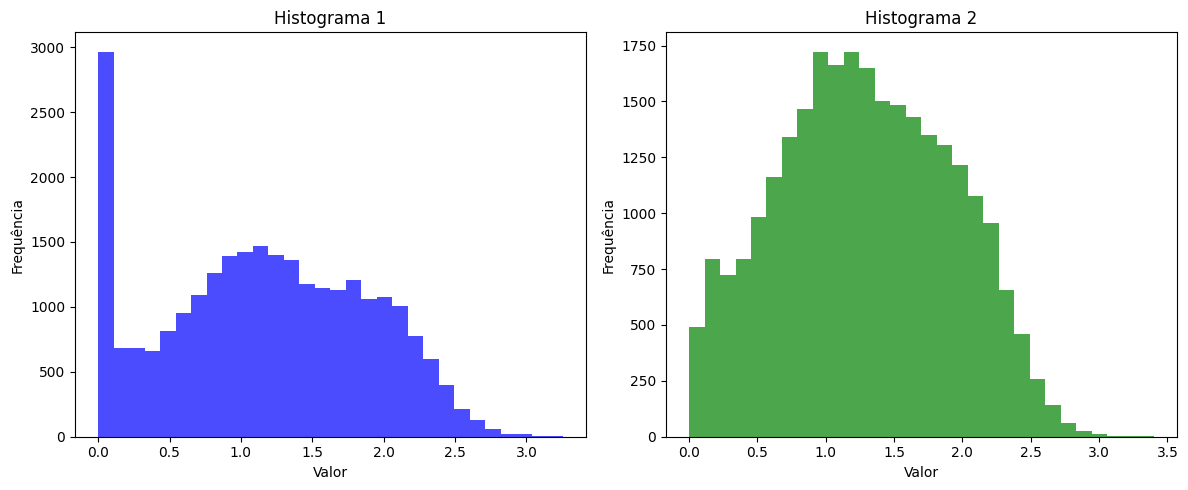

In [17]:
data1 = rg1["radius_of_gyration"]
data2 = rg2["radius_of_gyration"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotar o primeiro histograma no primeiro subplot
axes[0].hist(data1, bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histograma 1')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frequência')

# Plotar o segundo histograma no segundo subplot
axes[1].hist(data2, bins=30, color='green', alpha=0.7)
axes[1].set_title('Histograma 2')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os plots
plt.show()

### Maximum Distance

In [18]:
from skmob.measures.individual import maximum_distance

In [19]:
maximum_distance1 = maximum_distance(intas1)
maximum_distance2 = maximum_distance(intas2)

100%|██████████| 26446/26446 [01:19<00:00, 331.43it/s]


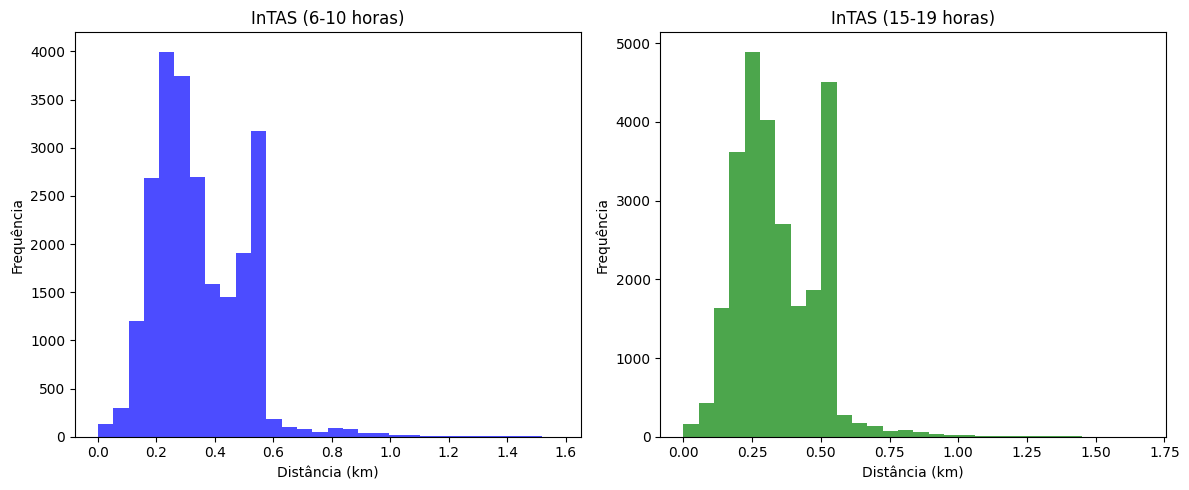

In [27]:
hist_plot(
    maximum_distance1["maximum_distance"],
    maximum_distance2["maximum_distance"],
   intas_title1,
   intas_title2,
    "Distância (km)",
    "Frequência"
)

### Distance straight line

In [28]:
from skmob.measures.individual import distance_straight_line

In [29]:
dsl_df1 = distance_straight_line(intas1)
dsl_df2 = distance_straight_line(intas2)

100%|██████████| 26446/26446 [01:30<00:00, 291.13it/s]


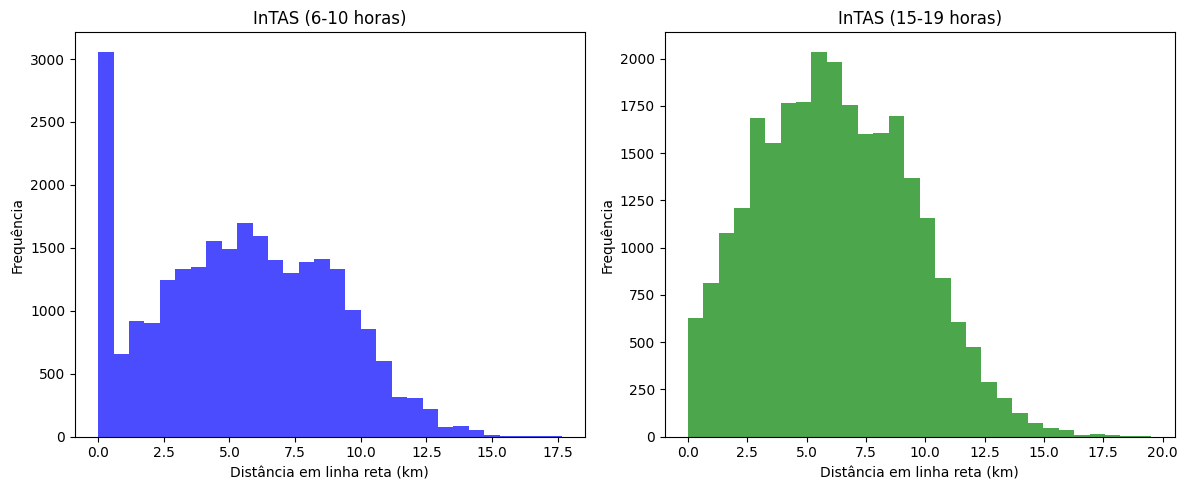

In [31]:
hist_plot(
    dsl_df1["distance_straight_line"],
    dsl_df2["distance_straight_line"],
    intas_title1,
    intas_title2,
    "Distância em linha reta (km)",
    "Frequência",
)

### Clustering

In [9]:
from skmob.preprocessing.clustering import cluster

In [10]:
intas_cluster1 = cluster(intas1)
intas_cluster2 = cluster(intas2)

### Compression

In [11]:
from skmob.preprocessing import compression

In [12]:
ctdf1 = compression.compress(intas1, spatial_radius_km=0.2)
ctdf2 = compression.compress(intas2, spatial_radius_km=0.2)

### Stay Locations

In [16]:
from skmob.preprocessing import detection

In [18]:
stdf1 = detection.stay_locations(intas1)
stdf2 = detection.stay_locations(intas2)

### Home e Work Classification

In [5]:
from skmob.measures.individual import home_location

In [10]:
hl_df1 = home_location(intas1)
hl_df2 = home_location(intas2)

100%|██████████| 26446/26446 [02:22<00:00, 186.10it/s]


### Outliers Detection

In [14]:
from skmob.preprocessing import filtering

In [15]:
ftdf1 = filtering.filter(intas1, max_speed_kmh=500)
ftdf2 = filtering.filter(intas2, max_speed_kmh=500)

### Spatial Projection

In [9]:
m1 = intas1.plot_trajectory(
    zoom=12,
    weight=3,
    opacity=0.9,
    start_end_markers=False,
    max_users=len(intas1['uid'].unique())
)
m2 = intas2.plot_trajectory(
    zoom=12,
    weight=3,
    opacity=0.9,
    start_end_markers=False,
    max_users=len(intas1['uid'].unique())
)